In [1]:
import pandas as pd
from utils import utils
from models import models
from tensorflow import keras

In [2]:
CONFIG_YML = "../experiments/exp_010/config_010.yml"
WEIGHTS = "../experiments/exp_010/model.06-1.5956.h5"

In [3]:
config = utils.load_config(CONFIG_YML)
config

{'seed': 123,
 'data': {'train_df': '/home/app/src/data/train_df_zoom.csv',
  'val_df': '/home/app/src/data/val_df.csv',
  'test_df': '/home/app/src/data/test_df.csv'},
 'model': {'weights': 'imagenet',
  'classes_movement': 4,
  'classes_scale': 5,
  'dropout_rate': 0.5,
  'image_size': 224,
  'channels': 3,
  'batch_size': 8,
  'frames': 8,
  'trainable_layers': None},
 'compile': {'optimizer': {'adam': {'learning_rate': 0.0005}},
  'loss': 'sparse_categorical_crossentropy',
  'metrics': ['accuracy']},
 'fit': {'epochs': 20,
  'callbacks': {'model_checkpoint': {'filepath': '../experiments/exp_010/model.{epoch:02d}-{val_loss:.4f}.h5',
    'save_best_only': True,
    'verbose': 1},
   'tensor_board': {'log_dir': '../experiments/exp_010/logs'},
   'reduce_on_plateau': {'verbose': 1, 'patience': 2}}}}

In [4]:
MODEL_CLASSES_MOVEMENT,MODEL_CLASSES_SCALE = utils.get_class_names(config)

if len(MODEL_CLASSES_MOVEMENT) != config['model']['classes_movement']:
    raise ValueError(
        "Number of classes doesn't match between your model "
        "and your data!"
    )
    
if len(MODEL_CLASSES_SCALE) != config['model']['classes_scale']:
    raise ValueError(
        "Number of classes doesn't match between your model "
        "and your data!"
    )


In [5]:
MODEL_CLASSES_SCALE

['CS', 'ECS', 'FS', 'LS', 'MS']

In [6]:
test_df=pd.read_csv(config["data"]["test_df"],index_col='Unnamed: 0')

test_generator = models.DataGenerator(test_df, config['model']['batch_size'], output = 'both')

In [7]:
test_df

,scale,movement,ubication,lenght_frames,frames_per_second,duration,inversed
0,LS,Static,../data/data_cleaned/test/tt2006051_shot_0009.mp4,108,24.000000,4.500000,no
1,MS,Static,../data/data_cleaned/test/tt2006051_shot_0010.mp4,70,24.000000,2.916667,no
2,MS,Static,../data/data_cleaned/test/tt2006051_shot_0020.mp4,31,24.000000,1.291667,no
3,LS,Static,../data/data_cleaned/test/tt2006051_shot_0022.mp4,365,24.000000,15.208333,no
4,FS,Motion,../data/data_cleaned/test/tt2006051_shot_0026.mp4,77,24.000000,3.208333,no
...,...,...,...,...,...,...,...
8182,FS,Static,../data/data_cleaned/test/tt6644200_shot_0011.mp4,26,23.976024,1.084417,no
8183,MS,Motion,../data/data_cleaned/test/tt6644200_shot_0015.mp4,38,23.976024,1.584917,no
8184,FS,Motion,../data/data_cleaned/test/tt6644200_shot_0021.mp4,47,23.976024,1.960292,no
8185,LS,Static,../data/data_cleaned/test/tt6644200_shot_0026.mp4,28,23.976024,1.167833,no


In [8]:
model=keras.models.load_model(WEIGHTS, compile=False)

# It should print your model correctly
print(model.summary())

2022-08-01 19:30:59.593196: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-01 19:30:59.606891: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-01 19:30:59.608022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-01 19:30:59.610830: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 8, 224, 224  0           []                               
                                , 3)]                                                             
                                                                                                  
 time_distributed_2 (TimeDistri  (None, 8, 2048)     23587712    ['input_6[0][0]']                
 buted)                                                                                           
                                                                                                  
 lstm_6 (LSTM)                  (None, 8, 256)       2360320     ['time_distributed_2[0][0]']     
                                                                                            

In [9]:
probabilities=model.predict(test_generator,verbose=1)

2022-08-01 19:31:17.661575: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200
2022-08-01 19:31:18.240106: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-08-01 19:31:18.240749: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-08-01 19:31:18.240801: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-08-01 19:31:18.252648: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-08-01 19:31:18.252899: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1024/1024 [==============================] - 2070s 2s/step


In [10]:
predictions_movement=[]
predictions_scale=[]

for prediction_movement in probabilities[0]:
    index_max_movement=prediction_movement.argmax()
    predictions_movement.append(MODEL_CLASSES_MOVEMENT[index_max_movement])
    
for prediction_scale in probabilities[1]:
    index_max_scale=prediction_scale.argmax()
    predictions_scale.append(MODEL_CLASSES_SCALE[index_max_scale])

In [11]:
labels_movement=test_df["movement"].values.tolist()
if len(set(predictions_movement)) != len(set(labels_movement)):
    raise ValueError(
        "The lenght of predictions and labels lists doesn't match!"
    )

if not isinstance(predictions_movement[0], str):
    raise ValueError(
        "Model predictions should be represented as string. E.g: 'Static'"
    )

if not isinstance(labels_movement[0], str):
    raise ValueError(
        "Ground true labels should be represented as string. E.g: 'Static'"
    )

In [12]:
labels_scale=test_df["scale"].values.tolist()
if len(set(predictions_scale)) != len(set(labels_scale)):
    raise ValueError(
        "The lenght of predictions and labels lists doesn't match!"
    )

if not isinstance(predictions_scale[0], str):
    raise ValueError(
        "Model predictions should be represented as string. E.g: 'CS'"
    )

if not isinstance(labels_scale[0], str):
    raise ValueError(
        "Ground true labels should be represented as string. E.g: 'CS'"
    )

Movement results
Model Performance metrics:
------------------------------
Accuracy: 0.6002
Macro Average Precision: 0.3278
Macro Average Recall: 0.3383
Macro Average F1 Score: 0.3225

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      Motion       0.47      0.66      0.55      2423
        Pull       0.02      0.05      0.02        80
        Push       0.02      0.04      0.03       220
      Static       0.81      0.61      0.69      5463

    accuracy                           0.60      8186
   macro avg       0.33      0.34      0.32      8186
weighted avg       0.68      0.60      0.62      8186


Prediction Confusion Matrix:
------------------------------


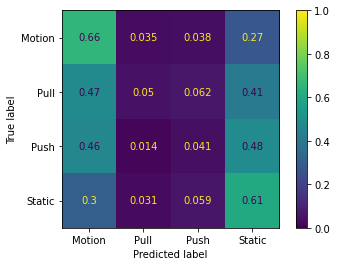

In [13]:
print('Movement results')

accuracy, precision, recall, f1_score=utils.get_performance(predictions_movement,labels_movement,MODEL_CLASSES_MOVEMENT)

Scale results
Model Performance metrics:
------------------------------
Accuracy: 0.8561
Macro Average Precision: 0.8602
Macro Average Recall: 0.8596
Macro Average F1 Score: 0.8592

Model Classification report:
------------------------------
              precision    recall  f1-score   support

          CS       0.81      0.82      0.82      1792
         ECS       0.87      0.85      0.86      1641
          FS       0.82      0.90      0.86      1642
          LS       0.92      0.92      0.92      1358
          MS       0.87      0.80      0.84      1753

    accuracy                           0.86      8186
   macro avg       0.86      0.86      0.86      8186
weighted avg       0.86      0.86      0.86      8186


Prediction Confusion Matrix:
------------------------------


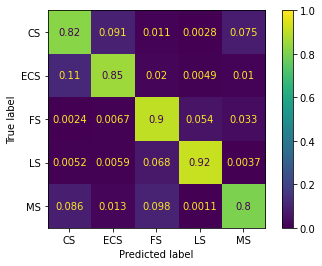

In [14]:
print('Scale results')

accuracy, precision, recall, f1_score=utils.get_performance(predictions_scale,labels_scale,MODEL_CLASSES_SCALE)